# Basic Neural Network Using PyTorch

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117
     ---------------------------------------- 4.9/4.9 MB 28.7 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 31.4 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 GB 1.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1


In [1]:
import torch 
import torch.nn as nn #stores the weight and bias tensors in the neural network
import torch.nn.functional as F #this module contains the activation functions
from torch.optim import SGD #performs stochastic gradient descent

import matplotlib.pyplot as plt
import seaborn as sns

**Let us try to implement the following basic neural network using PyTorch.**

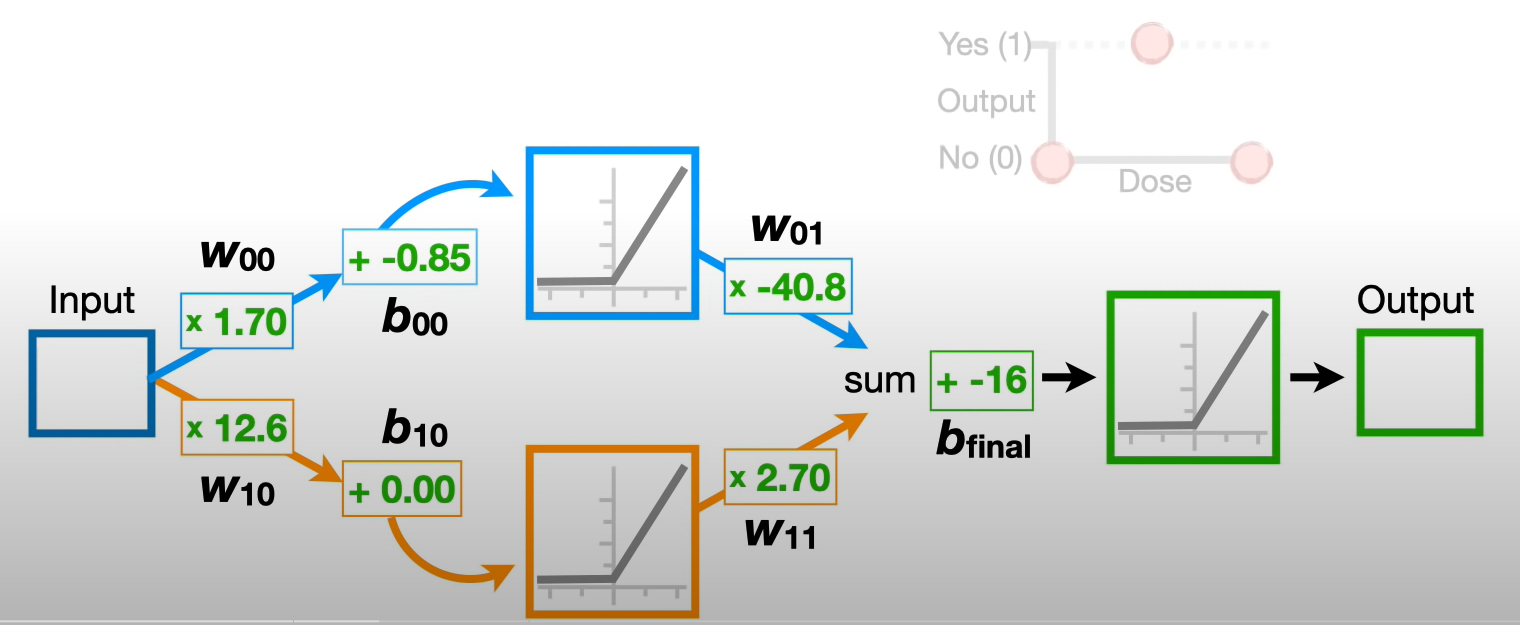

### Creating the Neural Network Class 

In [2]:
class NeuralNetwork(nn.Module): #The class NeuralNetwork is inheriting from the superior class nn.Module
    def __init__(self, epoch=1000, learning_rate=0.01):
        super().__init__()
        self.epoch = epoch
        self.learning_rate = learning_rate
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) #nn.parameters can be optimized
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False) #requires_grad is set to false when we dont optimize
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False) #Notice that these weights & biases are tensors
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True) #requires_grad is True so can we optimize this
    
    def forward(self, input):
        input_to_top_relu = input*self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = self.w01*top_relu_output
        
        input_to_bottom_relu = input*self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = self.w11*bottom_relu_output
        
        input_to_final_relu = scaled_top_relu_output+scaled_bottom_relu_output+self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output
    
    def backward(self, inputs, outputs):
        optimizer = SGD(self.parameters(), lr=self.learning_rate)
        for epoch in range(self.epoch):
            total_loss = 0
            for i in range(len(inputs)):
                output = self.forward(inputs[i])
                loss = (outputs[i]-output)**2
                loss.backward() #this line calculates gradients of the loss w.r.t. the optimzable parameters and accumulates them
                total_loss += loss #this line updates the loss
            
            if total_loss<0.0001:
                print(f"Total loss after {epoch} iterations: {total_loss}")
                break
            
            optimizer.step() #This line automatically updates the optimzable parameters 
            optimizer.zero_grad() #this line sets the gradients to zero for the next epoch
            
            print(f"Steps: {epoch}, Loss: {total_loss} Final bias: {self.final_bias.data}")

### Training and Testing the Model 

**Let us create some imaginary input and output doses**

In [3]:
input_doses = torch.linspace(start=0, end=1, steps=11) #torch.linspace is like np.linspace for tensors
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [4]:
output_doses = torch.tensor([0,0,0,0,0,1,0,0,0,0,0])
output_doses

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [5]:
model = NeuralNetwork()

In [6]:
model.backward(input_doses, output_doses)

Steps: 0, Loss: 933.2965698242188 Final bias: -1.6546001434326172
Steps: 1, Loss: 684.1657104492188 Final bias: -3.0113723278045654
Steps: 2, Loss: 516.6312866210938 Final bias: -4.126672744750977
Steps: 3, Loss: 401.6677551269531 Final bias: -5.078018665313721
Steps: 4, Loss: 317.4972839355469 Final bias: -5.896176338195801
Steps: 5, Loss: 255.2447509765625 Final bias: -6.599791526794434
Steps: 6, Loss: 209.16603088378906 Final bias: -7.208736419677734
Steps: 7, Loss: 174.14572143554688 Final bias: -7.752702713012695
Steps: 8, Loss: 146.0352783203125 Final bias: -8.24227237701416
Steps: 9, Loss: 123.26583099365234 Final bias: -8.68288516998291
Steps: 10, Loss: 104.82256317138672 Final bias: -9.079436302185059
Steps: 11, Loss: 89.88353729248047 Final bias: -9.436332702636719
Steps: 12, Loss: 77.78290557861328 Final bias: -9.757539749145508
Steps: 13, Loss: 67.98139953613281 Final bias: -10.046626091003418
Steps: 14, Loss: 60.031219482421875 Final bias: -10.3088960647583
Steps: 15, Loss

Steps: 174, Loss: 0.02794789709150791 Final bias: -15.84616756439209
Steps: 175, Loss: 0.026841141283512115 Final bias: -15.849444389343262
Steps: 176, Loss: 0.02577817812561989 Final bias: -15.852655410766602
Steps: 177, Loss: 0.024757392704486847 Final bias: -15.855802536010742
Steps: 178, Loss: 0.023776927962899208 Final bias: -15.85888671875
Steps: 179, Loss: 0.022835293784737587 Final bias: -15.861908912658691
Steps: 180, Loss: 0.021931037306785583 Final bias: -15.86487102508545
Steps: 181, Loss: 0.021062485873699188 Final bias: -15.86777400970459
Steps: 182, Loss: 0.020228296518325806 Final bias: -15.87061882019043
Steps: 183, Loss: 0.01942717656493187 Final bias: -15.873406410217285
Steps: 184, Loss: 0.018657870590686798 Final bias: -15.876138687133789
Steps: 185, Loss: 0.017918912693858147 Final bias: -15.878815650939941
Steps: 186, Loss: 0.01720939390361309 Final bias: -15.881439208984375
Steps: 187, Loss: 0.0165279358625412 Final bias: -15.884010314941406
Steps: 188, Loss: 0.

Note that the final value for the final bias matches that from the image above.

In [7]:
print(f"The final bias after optimization: {model.final_bias.data}")

The final bias after optimization: -16.0001220703125


**Let us check if the trained model performs as expected. The trained model is supposed to produce an output of 1 for an input dose of 0.5 only.**

In [22]:
model.forward(torch.tensor([0.01,0.91,0.5]))

tensor([0.0000, 0.0000, 1.0099], grad_fn=<ReluBackward0>)